In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv("mysticdata.csv", sep=";")
print(df)

            t          x           y          z
0    0.000000  152.79004  146.012330  184.04712
1    0.005712  140.93199  141.545430  190.74310
2    0.011424  166.84079  157.808170  158.01982
3    0.017136  169.43263  171.460330  142.72464
4    0.022848  145.67673  138.081150  192.44513
..        ...        ...         ...        ...
995  5.683427  206.24672  115.880165  111.26405
996  5.689139  175.49434   96.734146  176.99797
997  5.694851  162.17198   77.348060  185.07530
998  5.700563  155.18329   63.753395  206.43741
999  5.706275  206.49544  123.781296  113.54343

[1000 rows x 4 columns]


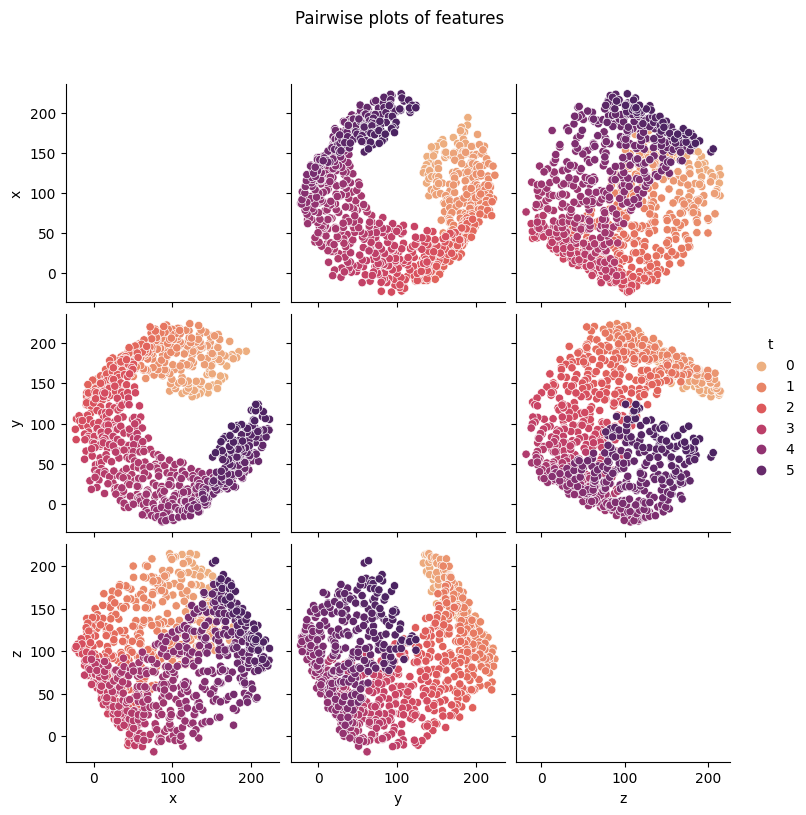

<Figure size 640x480 with 0 Axes>

In [3]:
#a)
g=sns.pairplot(df, hue="t", vars=["x", "y","z"],palette="flare")
g.fig.suptitle("Pairwise plots of features", y=1.08)
plt.show()

sns.despine(offset=5,trim=True)

In [23]:
#b)
X=df.loc[:, 'x':'z']

Y=df["t"]
#print(Y)

# data scaling
x_scaled = StandardScaler().fit_transform(X)


pca = PCA(n_components=1)
 
pca_features = pca.fit_transform(x_scaled)
 
print('Shape before PCA: ', x_scaled.shape)
print('Shape after PCA: ', pca_features.shape)

 
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1'])
pca_df['target'] = Y
print(pca_df)

Shape before PCA:  (1000, 3)
Shape after PCA:  (1000, 1)
          PC1    target
0    2.071469  0.000000
1    2.056638  0.005712
2    1.853173  0.011424
3    1.718191  0.017136
4    2.099601  0.022848
..        ...       ...
995  1.224754  5.683427
996  1.870505  5.689139
997  1.783670  5.694851
998  1.976277  5.700563
999  1.304014  5.706275

[1000 rows x 2 columns]


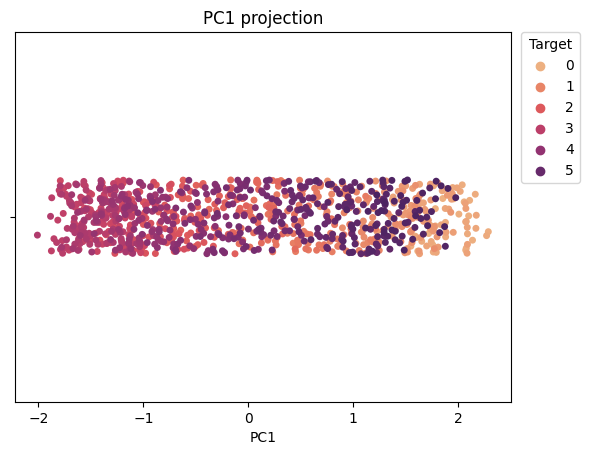

In [20]:
ax1=sns.stripplot(x="PC1",data=pca_df,hue="target", palette="flare").set(title='PC1 projection')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title="Target")

Text(0.5, 1.0, 'Histogram of PC1')

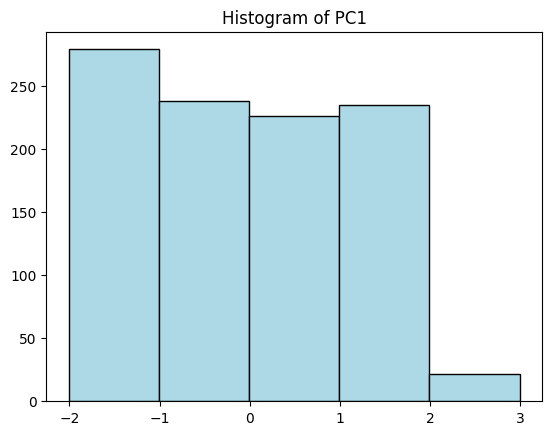

In [6]:
#plt.hist(pca_df["PC1"])
plt.hist(pca_df["PC1"], bins=np.arange(pca_df["PC1"].min(), pca_df["PC1"].max()+1), color = "lightblue", edgecolor='black')
plt.title("Histogram of PC1")

In [21]:
#c)
X=df.loc[:, 'x':'z']

Y=df["t"]
#print(Y)

# data scaling
x_scaled = StandardScaler().fit_transform(X)


pca = PCA(n_components=3)
 
pca_features = pca.fit_transform(x_scaled)
 
print('Shape before PCA: ', x_scaled.shape)
print('Shape after PCA: ', pca_features.shape)

 
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1','PC2','PC3'])
pca_df['target'] = Y
print(pca_df)

Shape before PCA:  (1000, 3)
Shape after PCA:  (1000, 3)
          PC1       PC2       PC3    target
0    2.071469  0.027375  0.114857  0.000000
1    2.056638 -0.057190  0.334457  0.005712
2    1.853173  0.076487 -0.408048  0.011424
3    1.718191 -0.026350 -0.718173  0.017136
4    2.099601  0.028278  0.339458  0.022848
..        ...       ...       ...       ...
995  1.224754  0.988535 -0.971796  5.683427
996  1.870505  0.800922  0.221828  5.689139
997  1.783670  0.858762  0.589329  5.694851
998  1.976277  0.908311  1.009033  5.700563
999  1.304014  0.904491 -1.010309  5.706275

[1000 rows x 4 columns]


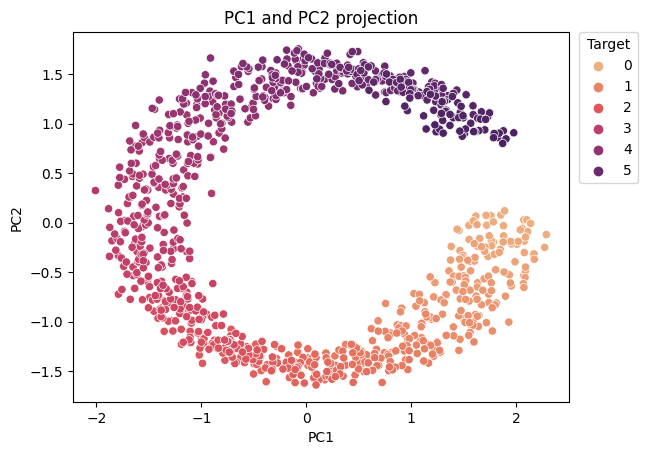

In [22]:
sns.scatterplot(data=pca_df, x="PC1", y="PC2",hue="target", palette="flare").set(title='PC1 and PC2 projection')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title="Target")

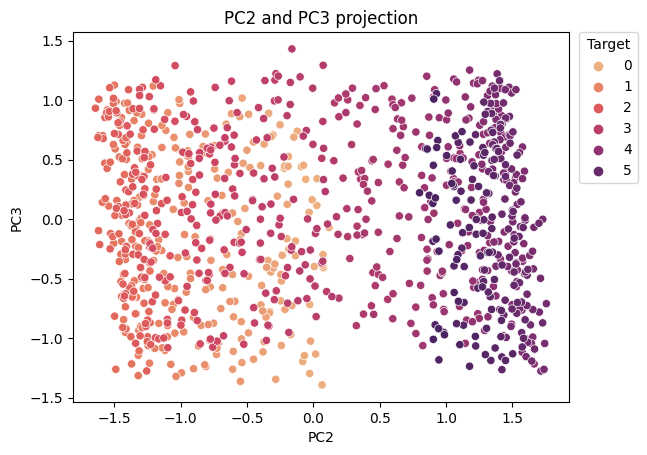

In [32]:
sns.scatterplot(data=pca_df, x="PC2", y="PC3",hue="target", palette="flare").set(title='PC2 and PC3 projection')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title="Target")

In [10]:
#d)
from sklearn.manifold import MDS
X=df.loc[:, 'x':'z']

Y=df["t"]
#print(Y)

# data scaling
x_scaled = StandardScaler().fit_transform(X)

embedding = MDS(n_components=2,metric="False")
x_transformed = embedding.fit_transform(x_scaled)
x_transformed.shape

mds_df = pd.DataFrame(
    data=x_transformed, 
    columns=['PC1','PC2'])
mds_df['target'] = Y
print(mds_df)

          PC1       PC2    target
0    1.217312  1.734349  0.000000
1    1.155956  1.802762  0.005712
2    1.133057  1.513262  0.011424
3    1.003970  1.498217  0.017136
4    1.252973  1.787868  0.022848
..        ...       ...       ...
995  1.607895  0.659804  5.683427
996  1.721309  1.165335  5.689139
997  1.794456  1.103302  5.694851
998  2.080118  1.310550  5.700563
999  1.593319  0.795722  5.706275

[1000 rows x 3 columns]


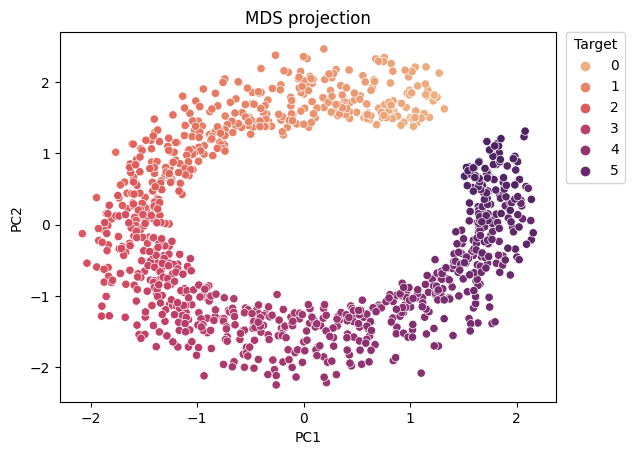

In [35]:
sns.scatterplot(data=mds_df, x="PC1", y="PC2",hue="target", palette="flare").set(title='MDS projection')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title="Target")

In [12]:
from sammon import sammon
X=df.loc[:, 'x':'z']

Y=df["t"]
#print(Y)

# data scaling
x_scaled = StandardScaler().fit_transform(X)



[x_transformed, E] = sammon(x_scaled, n=2)
x_transformed.shape

sammon_df = pd.DataFrame(
    data=x_transformed, 
    columns=['PC1','PC2'])
sammon_df['target'] = Y
print(sammon_df)

epoch = 1 : E = 0.0184151140
epoch = 2 : E = 0.0178474645
epoch = 3 : E = 0.0176572826
epoch = 4 : E = 0.0172681651
epoch = 5 : E = 0.0168118460
epoch = 6 : E = 0.0151048441
epoch = 7 : E = 0.0150149561
epoch = 8 : E = 0.0136262470
epoch = 9 : E = 0.0130703750
epoch = 10 : E = 0.0130088519
epoch = 11 : E = 0.0130078781
epoch = 12 : E = 0.0129971000
epoch = 13 : E = 0.0129951216
epoch = 14 : E = 0.0129926722
epoch = 15 : E = 0.0129897569
epoch = 16 : E = 0.0129894159
epoch = 17 : E = 0.0129881334
epoch = 18 : E = 0.0129853572
epoch = 19 : E = 0.0129851292
epoch = 20 : E = 0.0129849770
epoch = 21 : E = 0.0129849600
epoch = 22 : E = 0.0129841034
epoch = 23 : E = 0.0129840604
epoch = 24 : E = 0.0129840299
epoch = 25 : E = 0.0129840055
epoch = 26 : E = 0.0129839829
epoch = 27 : E = 0.0129839658
epoch = 28 : E = 0.0129839353
epoch = 29 : E = 0.0129839064
epoch = 30 : E = 0.0129838903
epoch = 31 : E = 0.0129838740
epoch = 32 : E = 0.0129838664
epoch = 33 : E = 0.0129838631
epoch = 34 : E = 0.

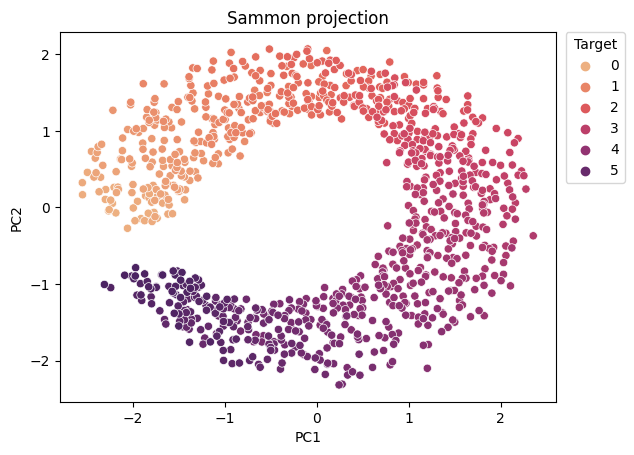

In [37]:
sns.scatterplot(data=sammon_df, x="PC1", y="PC2",hue="target", palette="flare").set(title='Sammon projection')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title="Target")

In [14]:
#e)
from sklearn.manifold import Isomap
X=df.loc[:, 'x':'z']

Y=df["t"]
#print(Y)

# data scaling
x_scaled = StandardScaler().fit_transform(X)

embedding = Isomap(n_neighbors=9, n_components=2)
x_transformed = embedding.fit_transform(x_scaled)
x_transformed.shape

isomap_df = pd.DataFrame(
    data=x_transformed, 
    columns=['PC1','PC2'])
isomap_df['target'] = Y
print(isomap_df)


          PC1       PC2    target
0    4.975073 -0.896258  0.000000
1    4.743359 -1.273508  0.005712
2    4.942065 -0.034794  0.011424
3    4.729183  0.360021  0.017136
4    4.823381 -1.303881  0.022848
..        ...       ...       ...
995 -4.815969  0.386540  5.683427
996 -4.866676 -1.169295  5.689139
997 -4.625201 -1.459335  5.694851
998 -4.686009 -1.661070  5.700563
999 -4.925472  0.328347  5.706275

[1000 rows x 3 columns]


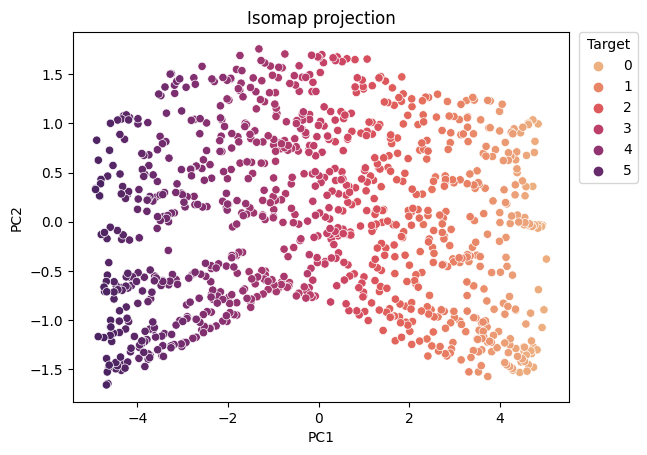

In [38]:
sns.scatterplot(data=isomap_df, x="PC1", y="PC2",hue="target", palette="flare").set(title='Isomap projection')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title="Target")